<a href="https://colab.research.google.com/github/JOSERAULHF29/APP_MOVIL_MATHEDU/blob/master/salesstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS DE DATOS DE SALES STORE**

LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

CARGAMOS DATASET

In [ ]:
df=pd.read_csv("store.csv")

INFO DE COLUMNAS X FILAS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

ELIMINACION DE DUPLICADOS

In [ ]:
df_analisis=df.drop_duplicates()

In [ ]:
df3=df_analisis.dropna()
df3.shape

(9994, 19)

In [ ]:
df_analisis.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


PROCESO DE CAMBIAR EL TIPO DE DATOS DE LAS COLUMNAS

In [ ]:
df_analisis['Order Date']=df_analisis['Order Date'].str.replace("/","-")


In [ ]:
df_analisis['Order Date']=pd.to_datetime(df_analisis['Order Date'],format='%m-%d-%Y' ,errors='coerce')


In [ ]:
df_analisis['Order Date'].tail(20)

,Order Date
9974,2016-12-06
9975,2016-12-06
9976,2016-12-06
9977,2016-12-06
9978,2016-12-06
9979,2016-12-06
9980,2015-09-06
9981,2017-08-03
9982,2016-09-22
9983,2016-09-22


In [ ]:
df_analisis['Ship Date']=df_analisis['Ship Date'].str.replace("/","-")

In [ ]:
df_analisis['Ship Date']=pd.to_datetime(df_analisis['Ship Date'],format='%m-%d-%Y' ,errors='coerce')

PROCESO DE LIMPIEZA DE ESPACIOS EN BLANCO DE COLUMAS STRING U OBJECT

In [ ]:
colum=df_analisis.select_dtypes(object).columns
df_analisis[colum]=df_analisis[colum].apply(lambda x:x.str.strip())


VALIDAMOS EL DATASET DESPUES DEL PROCESO DE LIMPIEZA

In [ ]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   datetime64[ns]
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   Country       9994 non-null   object        
 8   City          9994 non-null   object        
 9   State         9994 non-null   object        
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

APLICAMOS EL PROCESO DE TRANSFORMACION

In [ ]:
#rango de fecha del data set

fecha_max=df_analisis['Order Date'].max()
fecha_min=df_analisis['Order Date'].min()
print(f"el rango de fecha es {fecha_min} - {fecha_max}")

el rango de fecha es 2014-01-03 00:00:00 - 2017-12-30 00:00:00


In [ ]:
df_analisis.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
ganancia_neta=df_analisis['Profit'].sum().round(2)
ventas=df_analisis['Sales'].sum().round(2)
costo_total=ventas - ganancia_neta
print("ventas totales :",ventas)
print("costo total:",costo_total.round(2))
print("ganacia neta total:",ganancia_neta)


ventas totales : 2297200.86
costo total: 2010803.84
ganacia neta total: 286397.02


In [ ]:
promedio_ventas_cadaorden=df_analisis.groupby('Order ID')['Sales'].mean().sort_values(ascending=False).reset_index(name='promedio de ventas').head(5)
promedio_ventas_cadaorden


,Order ID,promedio de ventas
0,CA-2017-166709,10499.97
1,CA-2016-117121,9892.74
2,CA-2014-145541,6999.96
3,CA-2017-140151,4684.16
4,CA-2014-144624,4548.81


In [ ]:
promedio_ventas_orden = (
    df_analisis
    .groupby('Order ID')['Sales']
    .sum()
    .mean()
    .round(2)
)
print(promedio_ventas_orden)

458.61


In [ ]:
region_sales=(df_analisis.groupby('Region')['Sales']
                 .sum().round(2).sort_values(ascending=False)
                 .reset_index(name='total de ventas')

                 )
region_sales

,Region,total de ventas
0,West,725457.82
1,East,678781.24
2,Central,501239.89
3,South,391721.90


In [ ]:
region_profit=(df_analisis.groupby('Region')['Profit']
                 .sum().round(2).sort_values(ascending=False)
                 .reset_index(name='ganancia total')

                 )
region_profit


,Region,ganancia total
0,West,108418.45
1,East,91522.78
2,South,46749.43
3,Central,39706.36


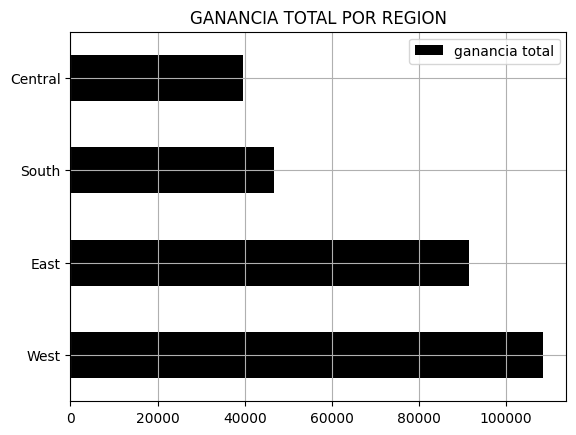

In [ ]:
region_profit.plot(x='Region',y='ganancia total',kind='barh',color='black')
plt.title("GANANCIA TOTAL POR REGION")
plt.ylabel("")
plt.grid(True)
plt.show()

In [ ]:
df_analisis[['Profit','Sales']].corr()

,Profit,Sales
Profit,1.000000,0.479064
Sales,0.479064,1.000000


In [ ]:
df_analisis['Profit'].value_counts().reset_index(name='cantidad').sort_values(by='cantidad',ascending=False)

,Profit,cantidad
0,0.0000,65
1,6.2208,43
2,9.3312,38
3,3.6288,32
4,5.4432,32
...,...,...
3501,90.5880,1
3500,1.3583,1
3499,5.1786,1
3498,40.6878,1


In [ ]:
df_analisis['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
ventas_categoria=(df_analisis.groupby('Category')
                         ['Sales'].sum().round(2)
                         .reset_index().sort_values(by='Sales',ascending=False))
ventas_categoria

,Category,Sales
2,Technology,836154.03
0,Furniture,741999.80
1,Office Supplies,719047.03


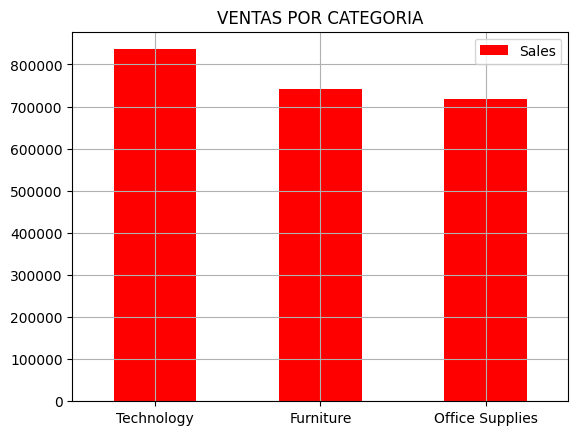

In [ ]:
ventas_categoria.plot(x='Category',y='Sales',kind='bar',color='red')
plt.title("VENTAS POR CATEGORIA")
plt.xlabel("")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
#

In [ ]:
df_analisis.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
#Sub-Category
gana_sub=df_analisis.groupby("Sub-Category")['Profit'].sum().round(2).reset_index().sort_values(by='Profit',ascending=False)
gana_sub

,Sub-Category,Profit
6,Copiers,55617.82
13,Phones,44515.73
0,Accessories,41936.64
12,Paper,34053.57
3,Binders,30221.76
5,Chairs,26590.17
14,Storage,21278.83
1,Appliances,18138.01
9,Furnishings,13059.14
7,Envelopes,6964.18


In [ ]:
top3_sub_gana=gana_sub.head(3)
top3_sub_gana
#

,Sub-Category,Profit
6,Copiers,55617.82
13,Phones,44515.73
0,Accessories,41936.64


In [ ]:
top3_sub_gana_des=gana_sub.tail(3).sort_values(by='Profit',ascending=True)
top3_sub_gana_des
#

,Sub-Category,Profit
16,Tables,-17725.48
4,Bookcases,-3472.56
15,Supplies,-1189.10


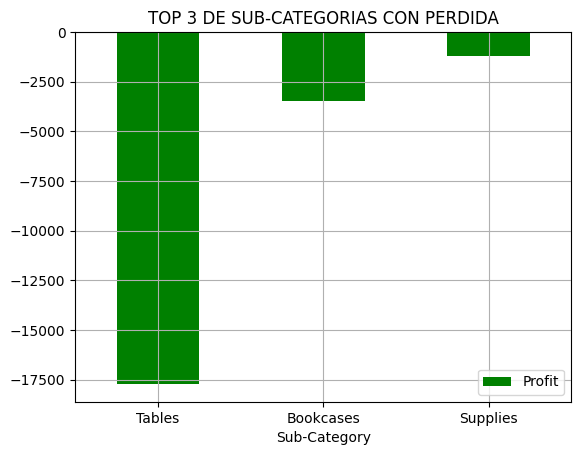

In [ ]:
top3_sub_gana_des.plot(x="Sub-Category",y="Profit",kind="bar",color='Green')
plt.title("TOP 3 DE SUB-CATEGORIAS CON PERDIDA")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
#

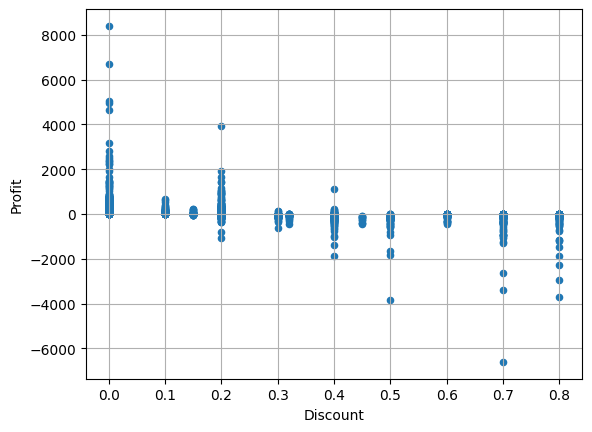

In [ ]:
df_analisis.plot(x='Discount',y='Profit',kind='scatter')
plt.grid(True)
plt.show()

In [ ]:
df_analisis.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
categoria_descuento=df_analisis.groupby('Category')['Discount'].mean().round(2).reset_index().sort_values(by='Discount',ascending=False)
categoria_descuento

,Category,Discount
0,Furniture,0.17
1,Office Supplies,0.16
2,Technology,0.13


In [ ]:
df_analisis.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
df_analisis["año_venta"]=df_analisis['Order Date'].dt.year

In [ ]:
df_analisis["mes_venta"]=df_analisis['Order Date'].dt.month_name()

In [ ]:
df_analisis.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,año_venta,mes_venta
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,June


In [ ]:
##AGRUPAMOS VENTA POR AÑO
venta_anio=df_analisis.groupby("año_venta")['Sales'].sum().round(2).reset_index().sort_values(by='Sales',ascending=False)
venta_anio
#

,año_venta,Sales
3,2017,733215.26
2,2016,609205.60
0,2014,484247.50
1,2015,470532.51


In [ ]:
grafia_venta=venta_anio.sort_values(by='año_venta',ascending=True)
grafia_venta

,año_venta,Sales
0,2014,484247.50
1,2015,470532.51
2,2016,609205.60
3,2017,733215.26


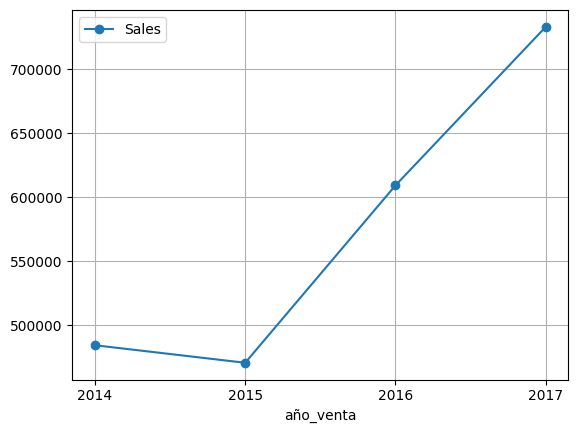

In [ ]:
grafia_venta.plot(x='año_venta',y='Sales',kind='line',marker='o')
plt.xticks(ticks=venta_anio['año_venta'])
plt.grid(True)
plt.show()


In [ ]:
venta_month=df_analisis.groupby("mes_venta")['Sales'].sum().round(2).reset_index().sort_values(by='Sales',ascending=False)
venta_month

,mes_venta,Sales
9,November,352461.07
2,December,325293.50
11,September,307649.95
7,March,205005.49
10,October,200322.98
1,August,159044.06
8,May,155028.81
6,June,152718.68
5,July,147238.10
0,April,137762.13


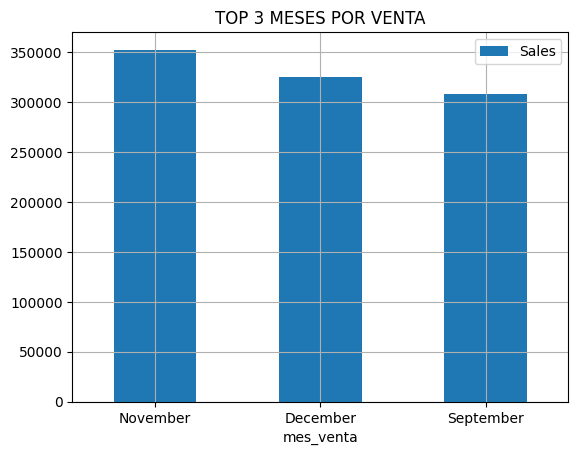

'fig=px.bar(top3,x=\'mes_venta\',y=\'Sales\',title="TOP 3 MESES POR VENTA")\nfig.update_xaxes(showgrid=True, gridcolor="lightgray")\nfig.update_yaxes(showgrid=True, gridcolor="lightgray")\n\n# Reducir tamaño\nfig.update_layout(\n    width=600,\n    height=400\n)\nfig.show()\n#'

In [ ]:
top3=venta_month.head(3)
top3.plot(x='mes_venta',y='Sales',kind='bar')
plt.title("TOP 3 MESES POR VENTA")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()
#
##otra forma con plotly.exprres : grafico mas interctivo
"""fig=px.bar(top3,x='mes_venta',y='Sales',title="TOP 3 MESES POR VENTA")
fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

# Reducir tamaño
fig.update_layout(
    width=600,
    height=400
)
fig.show()
#"""



In [ ]:
##ASIGNACION DE INDEX A ROW ID
df_analisis.set_index('Row ID',inplace=True)

In [ ]:
##CREAMOS UN COPITA DE DATAFRAME PARA PODER REALIZAR ALGUNAS TRASNFORMACIONES ESPECIFICAS
ventacopy=venta_month.copy()
#

In [ ]:
##  CREAMOS UNA LINEA DE CODIGO PARA PODER ORDENAS FECHAS
orden_meses = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
ventacopy['mes_venta']=pd.Categorical(ventacopy['mes_venta'],categories=orden_meses,ordered=True)
ventacopy

,mes_venta,Sales
9,November,352461.07
2,December,325293.50
11,September,307649.95
7,March,205005.49
10,October,200322.98
1,August,159044.06
8,May,155028.81
6,June,152718.68
5,July,147238.10
0,April,137762.13


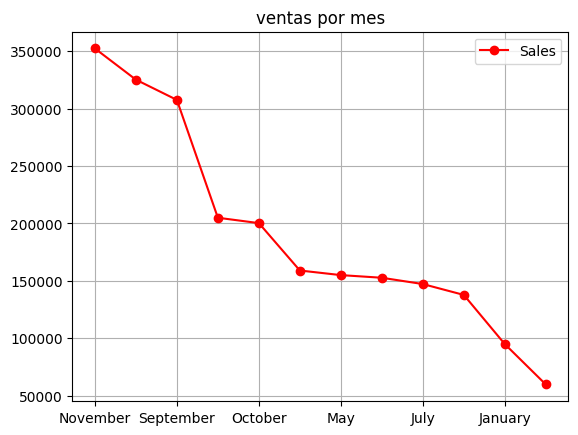

In [ ]:
ventacopy.plot(x="mes_venta",y="Sales",kind="line",marker="o",color="red")
plt.title("ventas por mes")
plt.xlabel("")
plt.grid(True)
plt.show()
#